<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
#ваш код здесь
df_origin = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
#ваш код здесь

df_origin.shape
df_origin.tail(3)
df_origin.isnull().value_counts()
df_origin['Ищет работу на должность:'].mode()
df_origin['Опыт работы'].value_counts()

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
#ваш код здесь
df_origin.isnull().mean()

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
#ваш код здесь
df_origin.info()


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [4]:
df_test = df_origin.copy()

In [5]:
# ваш код здесь
def get_education(educ_univer):
      list_stady = educ_univer.split(' ')
      if list_stady[1] == 'образование':
            stady = list_stady[0].lower()
      else:
            stady = list_stady[0].lower() + ' ' + list_stady[1]
      return stady

df_test['Образование'] = df_test['Образование и ВУЗ'].apply(get_education)
# df_test['Образование'].unique()
df_test = df_test.drop('Образование и ВУЗ', axis=1)
# Сколько соискателей имеет средний уровень образования (школьное образование)?
# (df_test['Образование'].value_counts())['среднее']

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [6]:
#ваш код здесь
def get_sex(age_sex):
      list_adge_sex = age_sex.split(' ')
      if list_adge_sex[0] == 'Мужчина':
            sex = 'М'
      else:
            sex = 'Ж'
      return sex

def get_age(age_sex):
      list_adge_sex = age_sex.split(' ')
      age = int(list_adge_sex[3])
      return age

df_test['Пол'] = df_test['Пол, возраст'].apply(get_sex)
df_test['Возраст'] = df_test['Пол, возраст'].apply(get_age)
df_test = df_test.drop('Пол, возраст', axis=1)
# Сколько процентов женских резюме представлено в наших данных?
# round((df_test['Пол'].value_counts(normalize=True))[1] * 100, 2)
# Чему равен средний возраст соискателей?
# round(df_test['Возраст'].mean(), 1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [7]:
#ваш код здесь
for i in range(len(df_test)):      
      if df_test.loc[i, 'Опыт работы'] == 'Не указано':
            df_test.loc[i, 'Опыт работы'] = np.nan
         
def get_experience(arg):
      month_key_words = ['месяц', 'месяцев', 'месяца']
      year_key_words = ['год', 'лет', 'года']
      if type(arg) == float:
            return np.nan
      else:
            first_splited = arg.split('  ')
            second_splited = first_splited[0].split(' ')
            month = 0
            year = 0
            for i in range(len(second_splited)):
                  if second_splited[i] in month_key_words:
                        month = second_splited[i-1]
                  if second_splited[i] in year_key_words:
                        year = second_splited[i-1]
            return int(year)*12 + int(month)

df_test['Опыт работы (месяц)'] = df_test['Опыт работы'].apply(get_experience)
df_test = df_test.drop('Опыт работы', axis=1)
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
# df_test['Опыт работы (месяц)'].median()


# 

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [8]:
# создание признака 'Город'
#dd = df_test.copy()

million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
def get_city(args):
      list_split = args.split(' ')
      if list_split[0] == 'Москва':
            return list_split[0]
      elif list_split[0] == 'Санкт-Петербург':
            return list_split[0]
      elif list_split[0] in million_cities:
            return 'город-миллионик'
      else:
            return 'другие'

df_test['Город'] = df_test['Город, переезд, командировки'].apply(get_city)
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
# dd['Город'].value_counts(normalize=True)

# создание признака 'Готовность к переезду'
def get_run(args):
        list_split = args.split(' , ')
        list_split_2 = list_split[-2]
        if list_split_2[0] == 'н':
                return False
        else:
             return True   
                
df_test['Готовность к переезду'] = df_test['Город, переезд, командировки'].apply(get_run)
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
# df_test[(df_test['Готовность к переезду'] == True) & (df_test['Готовность к командировкам'] == True)].count() * 100 / len(df_test)

def get_comand(args):
        list_split = args.split(',')
        list_split_2 = list_split[-1].split(' ')
        if list_split_2 == ['']:
                return False
        elif list_split_2[1] == 'не':
                return False
        else:
            return True 

df_test['Готовность к командировкам'] = df_test['Город, переезд, командировки'].apply(get_comand)
df_test = df_test.drop('Город, переезд, командировки', axis=1) 

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [ ]:
# создание признаков-мигалок: 'полная занятость', 'частичная занятость', 'проектная работа', 'волонтёрство', 'стажировка'
# создание признаков-мигалок:'полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод'
# 1m 45s обработка

for k in range(len(df_test)):
        list_split = df_test.loc[k, 'Занятость'].split(', ')
        for i in list_split:
                df_test.loc[k, i] = True
        list_split_gr = df_test.loc[k, 'График'].split(', ')
        for i in list_split_gr:
                df_test.loc[k, i] = True
                
# исправление пустых данных в признаке-мигалке на False
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
all_list = employment + schedule
for i in all_list:
        for k in range(len(df_test)):       
                if pd.isna(df_test.loc[k, i]) == True:
                        df_test.loc[k, i] = False
                        
df_test = df_test.drop('Занятость', axis=1)
df_test = df_test.drop('График', axis=1)      

# приведение к типу bool
list_bool = all_list
for i in list_bool:
        df_test[i] = df_test[i].astype(bool)

# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
df_test[(df_test['проектная работа'] == True) & (df_test['волонтерство'] == True)].count()
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
df_test[(df_test['вахтовый метод'] == True) & (df_test['гибкий график'] == True)].count()


# Удаление столбов созданых признаков-мигалок
# for i in all_list:
#        dd = dd.drop(i, axis=1)
                

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [10]:
#ваш код здесь
df_Exchange = pd.read_csv('ExchangeRates.csv')
df_Exchange['date'] = pd.to_datetime(df_Exchange['date'], errors='coerce')
df_Exchange = df_Exchange.rename(columns={'date': 'Обновление резюме'})
df_Exchange = df_Exchange.rename(columns={'currency': 'валюта'})
df_Exchange['close'] = df_Exchange['close'].astype(float)

# Приведение в формат %Y-%m-%d, отсекание времени
#dd['Обновление резюме'] = pd.to_datetime(dd['Обновление резюме'], errors='coerce')
def get_date(args):
        args = pd.to_datetime(args, errors='coerce')
        return args.strftime('%Y-%m-%d')
df_test['Обновление резюме'] = df_test['Обновление резюме'].apply(get_date)
df_test = df_test.astype({'Обновление резюме': np.datetime64})

# Выделение суммы ЗП
def get_wages(args):
        list = args.split(' ')
        return list[0]
df_test['ЗП число'] = df_test['ЗП'].apply(get_wages)

# Перевод наименование валюты в стандарт ISO
def  get_currency(args):
        temp = {'руб': 'RUB', 'грн': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел': 'BYN', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT'}
        list_split = args.split(' ')
        list_split_2 = list_split[1].split('.')
        return temp[list_split_2[0]]
df_test['валюта'] = df_test['ЗП'].apply(get_currency)

# объединение
merged = df_test.merge(
    df_Exchange,
    on=['Обновление резюме', 'валюта'],
    how='left'
)

for i in ['per', 'time', 'vol']:
         merged = merged.drop(i, axis=1)

# Установка цены close = 1 для RUB и proportion
def remove_nan(args):
    if pd.isna(args) == True:
            return 1
    else:
        return args
merged['close'] = merged['close'].apply(remove_nan)
merged['proportion'] = merged['proportion'].apply(remove_nan)
merged['ЗП число'] = merged['ЗП число'].astype(int)
merged['ЗП (руб)'] = merged['ЗП число'] * merged['close'] / merged['proportion'] 

# удаление ненужных\отработаных признаков
list_del = ['ЗП', 'ЗП число', 'валюта', 'close', 'proportion']
for i in list_del:
        merged = merged.drop(i, axis=1)
  
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
merged['ЗП (руб)'].median()

59019.0

In [119]:
#merged.to_csv('data_HH')

df.to_csv('data_HHH')


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data_HH = pd.read_csv('data_HH')
data_HH = data_HH.drop('Unnamed: 0', axis=1)

0    30
Name: Возраст, dtype: int64

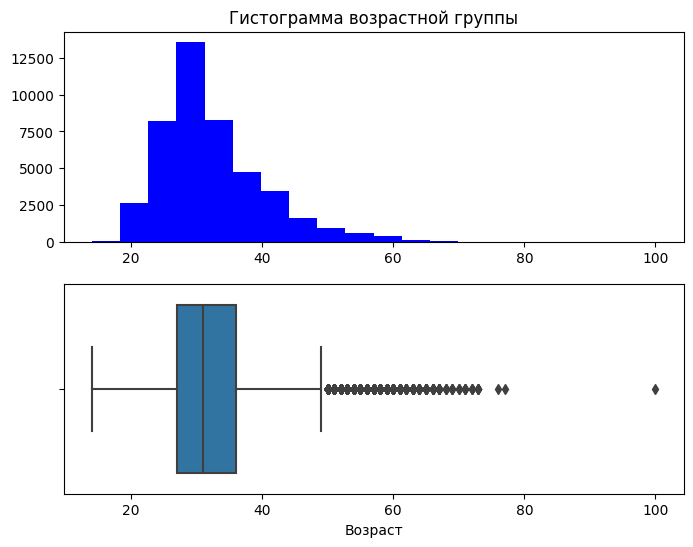

In [30]:
# ваш код здесь
df = data_HH['Возраст']
# визуализация систем координат
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# гистограмма
axes[0].hist(
    x=df, label="Возраст", color="blue", bins=20
)
axes[0].set_title("Гистограмма возрастной группы")
axes[0].xaxis.set_tick_params()

# коробчатая
dff = df.reset_index()
sns.boxplot(data=dff, x="Возраст")

# Чему равно модальное значение возраста соискателей?
data_HH["Возраст"].mode()

In [ ]:

merged[(merged["Возраст"] >= 25) & (merged["Возраст"] <= 40)].count() * 100 / len(merged)
merged[merged["Возраст"] >= 75].count()


Основная часть соискателей находится примерно в возрасте от 25 до 40 лет, это костяк трудового ресурса, ~ 72% от общего числа резюме. Самый часто встречающийся возраст(топовый) 30 лет у соискателей, средний возраст соискателя ~ 32 года. Видно по графику что больше соискателей в диапазоне от 30 и далее, чем до 30, так же график имеет более плавную, сглаженную структуру(параболическую). В коробчатой диаграмме видно выбросы: 1 соискатель в возрасте 100 лет, два соискателя  старше 75, итого 3 резюме, судить об ошибках пока рано, но вероятнее, что 100 лет - это шутка.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0

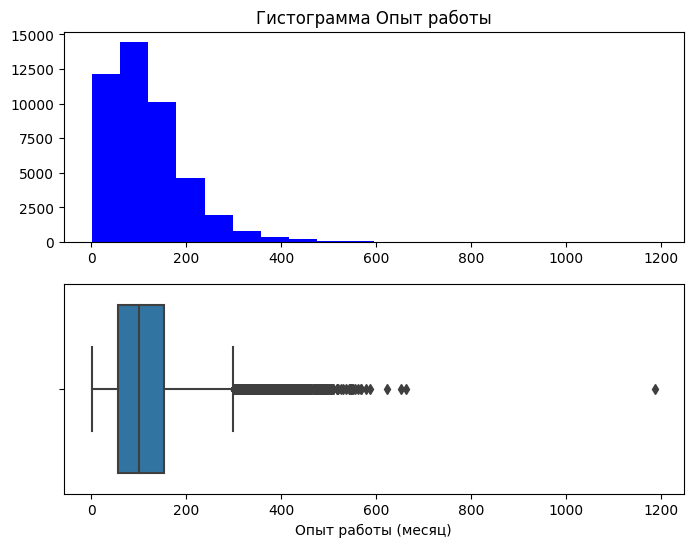

In [241]:
# ваш код здесь
df = data_HH['Опыт работы (месяц)']
# визуализация систем координат
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# гистограмма
axes[0].hist(
    x=df, label="index", color="blue", bins=20
)
axes[0].set_title("Гистограмма Опыт работы")
axes[0].xaxis.set_tick_params()

# коробчатая
dff = df.reset_index()
sns.boxplot(data=dff, x="Опыт работы (месяц)")

# Чему равно модальное значение возраста соискателей?
data_HH["Опыт работы (месяц)"].max()

In [246]:
merged[merged["Опыт работы (месяц)"] == '1188']['Возраст']

Series([], Name: Возраст, dtype: int64)


Основная часть соискателей имеет опыт до 150 мес.(12.5 лет) это ~ 73% от общего числа резюме. Самый часто встречающийся опыт(топовый) 81 мес.(6.75 лет), средний опыт соискателя ~ 114 мес.(9.5 лет). Видно по графику что после среднего показателя опыта в 114 мес. кол-во соискателей начинает плвно уменьшаться. В коробчатой диаграмме видно выбросы: 1 соискатель оказывается имеет опыт в 1188 мес это 99 лет, предположу что все таки это ошибка, ошиблись порядком и опыт должен быть 118.8 мес.(9.9 лет), три соискателя имеют опыт более 600мес.(50 лет) отчасти похоже на правду.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


5    23
dtype: int64

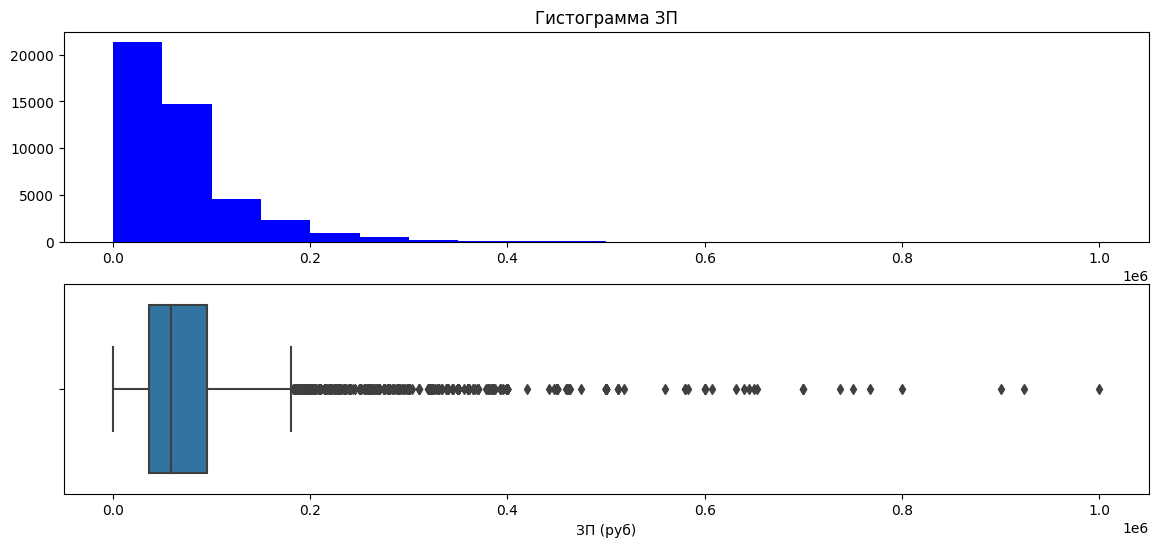

In [55]:
# ваш код здесь
df = data_HH.copy()
# подправил 5 соискателей а ЗП 1,5 * e6
df.loc[6931, 'ЗП (руб)'] = df.loc[6931, 'ЗП (руб)'] / 100
g = df[df['ЗП (руб)'] > 1500000].index
for i in g:
    df.loc[i, 'ЗП (руб)'] = df.loc[i, 'ЗП (руб)'] / 10

df_data = df['ЗП (руб)']

# визуализация систем координат
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

# гистограмма
axes[0].hist(
    x=df_data, label="ЗП (руб)", color="blue", bins=20
)
axes[0].set_title("Гистограмма ЗП")
axes[0].xaxis.set_tick_params()

# коробчатая
df_data = df_data.reset_index()
sns.boxplot(data=df_data, x="ЗП (руб)")

# Чему равно модальное значение возраста соискателей?
merged[merged["ЗП (руб)"] > 1000000].count().value_counts()

In [69]:
print('оригинал дата, расчет моды', data_HH["ЗП (руб)"].mode())
print('исправленый дата, расчет моды',df["ЗП (руб)"].mode())
orig = data_HH[(data_HH["ЗП (руб)"] >= 0) & (data_HH["ЗП (руб)"] <= 100000)].count() * 100 / len(data_HH)
red = df[(df["ЗП (руб)"] >= 0) & (df["ЗП (руб)"] <= 100000)].count() * 100 / len(df)
print('оригинал дата, расчет %', orig["ЗП (руб)"])
print('исправленый дата, расчет %', red["ЗП (руб)"])
print('оригинал дата, расчет средней', data_HH["ЗП (руб)"].mean())
print('исправленый дата, расчет средней', df["ЗП (руб)"].mean())
df["ЗП (руб)"].describe()
# Размер ЗП в верхнем пределе диаграммы
upp = 95000 + 1.5 * (95000 - 37082)
df["ЗП (руб)"].min()


оригинал дата, расчет моды 0    50000.0
Name: ЗП (руб), dtype: float64
исправленый дата, расчет моды 0    50000.0
Name: ЗП (руб), dtype: float64
оригинал дата, расчет % 80.69685320936885
исправленый дата, расчет % 80.69685320936885
оригинал дата, расчет средней 76533.53992967868
исправленый дата, расчет средней 75695.56100870605


1.0

Основная часть соискателей ищет ЗП до 100 тыс. руб. это ~ 80% от общего числа резюме. Самая желанная ЗП составляет 50 тыс. руб.(модальная). Видно по графику, что после среднего показателя ЗП ~ 76.5 тыс. руб. кол-во соискателей начинает плавно уменьшаться(по параболе).

Изначально было произведена корректировка 5ти ЗП, их значение не давали визуально анализировать коробчатую диаграмму. макимальное ЗП в 24 миллиона просто поражает, была уменшена в 100 раз, остальные ЗП > 1.5*e6 ,были уменьшены в 10 раз, график стал читаем, исправление повлияло на показатель средней ЗП: средняя упала на 1.2 тыс. руб и составила ~ 75.7 тыс. руб. 1 соискатель указал ЗП в 1 миллион, решил пока не исправлять.Так же присутствует минимальное значение в 1р. предпологаю, что указано для увеличения кол-ва просмотров от работодателей при поиске в диапазоне скажем до 50 тыс.(обычно указывают верхний предел, при любом диапазоне резюме будет включено)
 В коробчатой диаграмме по исправленным данным видно выбросы выше значения в 182 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

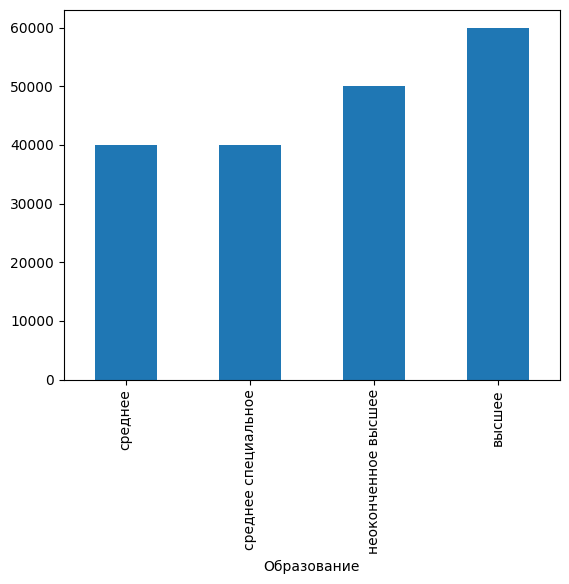

In [102]:
# ваш код здесь
df = data_HH.copy()
mask = df['ЗП (руб)'] < 1000000
data = df[mask].groupby(by='Образование')['ЗП (руб)'].median().sort_values(ascending=True).plot(kind='bar');

In [88]:
data

NameError: name 'data' is not defined

Среднее и среднее специальное образования имеют наименьший уровень желаемой ЗП. Высшее образование имеет наибольший уровень желаемой ЗП. При прогнозировании ЗП важно учитывать признак уровня образования.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

33449    другие
Name: Город, dtype: object

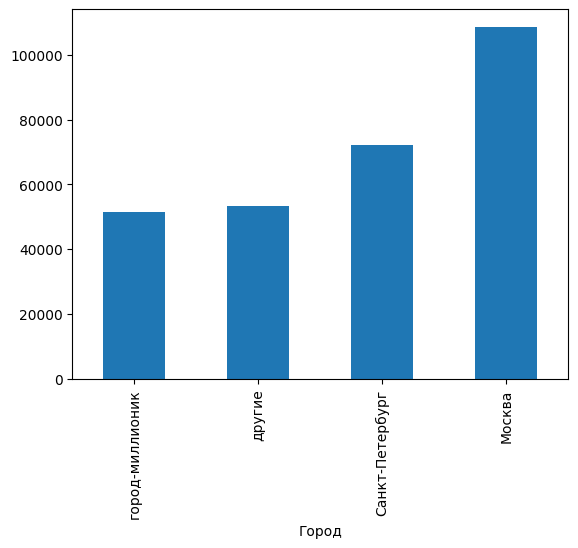

In [109]:
df = data_HH.copy()

mask = df['ЗП (руб)'] < 1000000
data = df[mask].groupby(by='Город')['ЗП (руб)'].median().sort_values(ascending=True).plot(kind='bar');

# В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы
# (~924 тысячи рублей)?
mask2 = df['ЗП (руб)'] == 923983.0
df[mask & mask2]['Город']

Медианный уровень желаемой заработной платы наибольший в городах Санкт-Петербург и Москва. Поэтому при прогнозировании уровня ЗП следует учитывать признак только этих двух городов, остальные города-признаки можно не учитывать или объединить в одну общую - "другие".

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

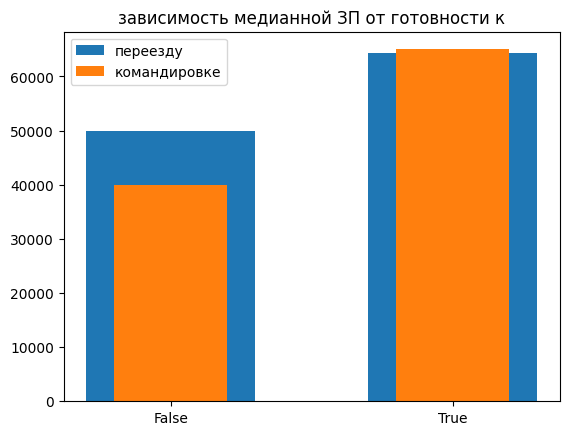

In [199]:
df = data_HH.copy()
data = df.groupby(by='Готовность к переезду')['ЗП (руб)'].median()
data = data.reset_index()
data2 = df.groupby(by='Готовность к командировкам')['ЗП (руб)'].median()#.plot(kind='bar');
data2 = data2.reset_index()

fig, ax = plt.subplots()
rects1 = ax.bar(data['Готовность к переезду'], data['ЗП (руб)'],width = 0.6,  label='переезду')
rects2 = ax.bar(data2['Готовность к командировкам'], data2['ЗП (руб)'],width= 0.4,  label='командировке')
ax.set_title('зависимость медианной ЗП от готовности к')
ax.set_xticks(data['Готовность к переезду'])
ax.set_xticklabels(data['Готовность к переезду'])

ax.legend()

In [252]:
df = data_HH.copy()
mask = df['Готовность к переезду'] == True
mask2 = df['Готовность к командировкам'] == True
ff = df[mask & mask2]['ЗП (руб)'].median()
ff = df[mask & mask2].groupby(by='Готовность к переезду', as_index=False)['ЗП (руб)'].median()

bar_data = data_HH.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
bar_data
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

На диаграмме заметна зависимость повышения уровня желаемой медианной ЗП от готовности к командировкам и переездам, ожидание(желание) более высокой ЗП сводит к минимуму такой негативный признак как переезд и командировка.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

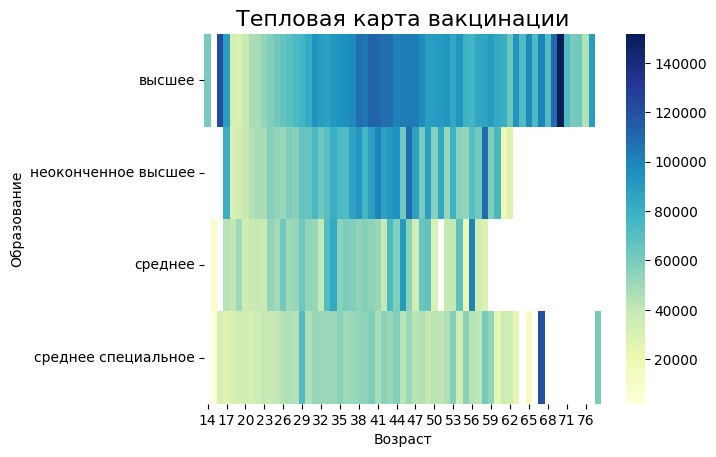

In [257]:
# ваш код здесь
pivot = data_HH.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
)
#pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
df = data_HH.copy()
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=df['Возраст'], 
    y=df['Опыт работы (год)'], 
    s=2,
    marker='.',
    c = 'blue'
)
plt.plot([0,100],[0,100])

df[df['Опыт работы (год)'] >= df['Возраст']].count()


ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [50]:
# ваш код здесь
df = data_HH.copy()
aa = len(df)
df = df.drop_duplicates()
bb = len(df)
aa - bb

161

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [51]:
# ваш код здесь
df['Опыт работы (месяц)'].isna().value_counts()


False    44415
True       168
Name: Опыт работы (месяц), dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [52]:
# удаление строк с пропусками
# df = data_HH.copy()

data_isna = df['Последняя/нынешняя должность'].isna()

for i in range(len(data_isna)):
        if data_isna.iloc[i] == True:
                df=df.drop([i])
data_isna2 = df['Последнее/нынешнее место работы'].isna()
for i in range(len(data_isna2)):
        if data_isna2.iloc[i] == True:
                df=df.drop([i])

values = {'Опыт работы (месяц)': df['Опыт работы (месяц)'].median()}
#заполняем пропуски в соответствии с заявленным словарем
df = df.fillna(values)
# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» 
df['Опыт работы (месяц)'].mean()         
               


114.35080753701212

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [73]:
# ваш код здесь
mask = df['ЗП (руб)'] > 1000000
mask2 = df['ЗП (руб)'] < 1000

del_data = df[mask].index
for i in del_data:
        df=df.drop([i])
del_data2 = df[mask2].index
for i in del_data2:
        df=df.drop([i])       

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12
del_data = df[df['Опыт работы (год)'] >= df['Возраст']].index

for i in del_data:
        df=df.drop([i])
        
# df[df['Опыт работы (год)'] >= df['Возраст']].count()

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [97]:
# ваш код здесь
dff = df.copy()
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(dff, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}') #'mkad_km',

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44481


In [ ]:
log_ = np.log(dff['Возраст'])
sns.histplot(log_, bins=30, ax=ax)

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(dff['Возраст'])
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
#histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
#histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
#histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Возраст')

ваш коммментарий здесь